In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc('font', size = 14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style = 'white')
sns.set(style = 'whitegrid', color_codes = True)

In [2]:
url = 'https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv'
data = pd.read_csv(url)

In [3]:
data['job'].unique()

array(['blue-collar', 'technician', 'management', 'services', 'retired',
       'admin.', 'housemaid', 'unemployed', 'entrepreneur',
       'self-employed', 'unknown', 'student'], dtype=object)

In [3]:
data = data.dropna()
print(data.shape)
print(list(data.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [4]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


이 데이터셋에는 고객의 은행정보가 담겨져 있다. 21개의 features와  41188개의 행이 있다.

In [5]:
# 데이터 특성살펴보기
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

다행히 결측치는 존재하지 않는다.\
y는 고객이 term deposit을 구독할지 안할지(0 or 1)에 대한 정보이다.

In [6]:
data['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

1. education column은 많은 카테고리를 가지고 있고, 우린 모델링을 위해서 카테고리를 줄여야한다.\
2. group을 통해 카테코리를 새로 만들어 보겠다.

In [7]:
# Let us group 'basic.4y', 'basic.9y' and 'basic.6y'
data['education'] = np.where(data['education'] == 'basic.9y', 'Basic', data['education'])
data['education'] = np.where(data['education'] == 'basic.6y', 'Basic', data['education'])
data['education'] = np.where(data['education'] == 'basic.4y', 'Basic', data['education'])

In [8]:
# 컬럼 확인하기
data['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

# EDA

In [9]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

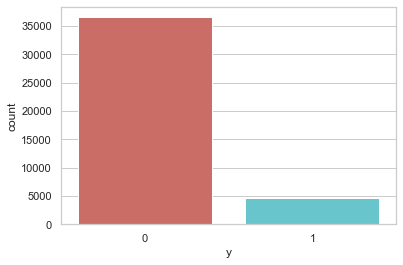

<Figure size 432x288 with 0 Axes>

In [10]:
sns.countplot(x = 'y', data = data, palette = 'hls')
plt.show()
plt.savefig('count_plot')

정기권을 갖지 않는 사람이 88.734..%\
정기권을 갖는 사람이 11.2654..%\
\
이 클래스는 불균형하다. 균형을 맞추기 전에 좀 더 살펴보아야 한다. 

In [11]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


- 정기 예금을 구매 한 고객의 평균 연령은 구매하지 않은 고객보다 높습니다.
- pdays (고객이 마지막으로 연락 한 이후의 일수)는 구매 한 고객의 경우 당연히 더 낮습니다. pdays가 낮을수록 마지막 통화의 기억력이 좋아져 판매 가능성이 높아집니다.
- 놀랍게도 정기 예금을 구매 한 고객의 경우 캠페인 (현재 캠페인 중 연락 또는 통화 수)이 적습니다.

##### 교육 및 결혼 상태와 같은 다른 범주 형 변수에 대한 범주 형 평균을 계산하여 데이터에 대한보다 자세한 의미를 얻을 수 있습니다.

In [12]:
data.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [13]:
data.groupby(['marital', 'y']).mean()

age    duration  campaign       pdays  previous  \
marital  y                                                          
divorced 0  44.318907  219.339217  2.667311  988.922872  0.131044   
         1  49.943277  553.138655  2.144958  792.399160  0.495798   
married  0  41.964145  221.204233  2.628550  986.273933  0.118637   
         1  45.341232  577.938389  2.079779  798.956951  0.482622   
single   0  33.453458  220.417270  2.623341  977.348412  0.163249   
         1  31.348765  513.952469  1.983951  781.414815  0.506790   
unknown  0  40.397059  256.588235  3.470588  969.941176  0.220588   
         1  39.583333  630.833333  1.583333  751.000000  0.583333   

            emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  \
marital  y                                                           
divorced 0      0.307930       93.628370     -40.772655   3.887242   
         1     -1.086765       93.417082     -40.137185   2.224223   
married  0      0.332783       93.623935     -40.354773   3.914493   
         1     -1.135703       93.362369     -39.526659   2.253996   
single   0      0.037817       93.548650     -41.048452   3.550635   
         1     -1.431790       93.324788     -40.121914   1.885499   
unknown  0     -0.101471       93.522868     -41.548529   3.441971   
         1     -0.900000       93.178750     -36.691667   2.582417   

            nr_employed  
marital  y               
divorced 0  5179.247921  
         1  5098.157353  
married  0  5179.883783  
         1  5100.777646  
single   0  5166.602815  
         1  5085.173025  
unknown  0  5163.610294  
         1  5122.166667

In [14]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
Basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113,0.087029
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


# 시각화

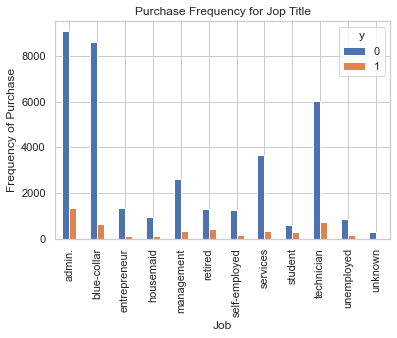

In [15]:
%matplotlib inline
pd.crosstab(data.job, data.y).plot(kind = 'bar')
plt.title('Purchase Frequency for Jop Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_jop')

보증금의 구매 빈도는 좋은 직책에 따라 의존한다.\
예측할 때 좋은 재료가 된다.

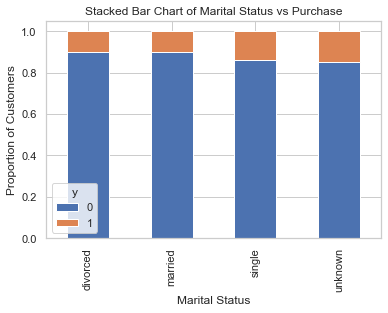

In [16]:
table = pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

이 변수의 상태는 결과값을 예측하기에 그리 좋지 못하다.

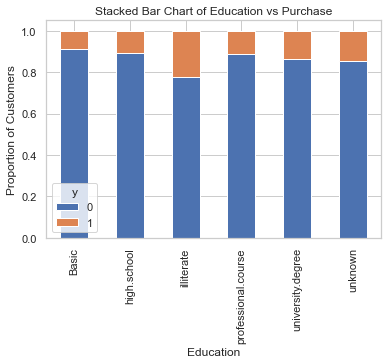

In [17]:
table = pd.crosstab(data.education, data.y)
table.div(table.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

education 변수는 결과값에 좋은 예측 재료가 되어 보인다.

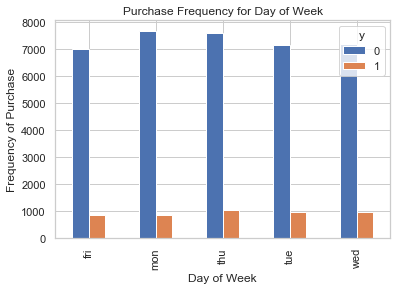

In [18]:
pd.crosstab(data.day_of_week, data.y).plot(kind = 'bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

요일은 좋지 못한 변수처럼 보인다.

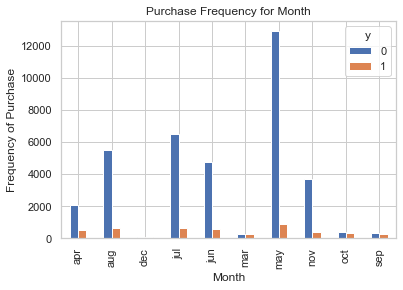

In [19]:
pd.crosstab(data.month, data.y).plot(kind = 'bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

월 변수는 사용하겠다.

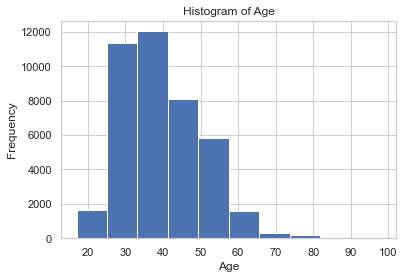

In [20]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

고객은 30~40대에 가장 많이 분포되어 있다.

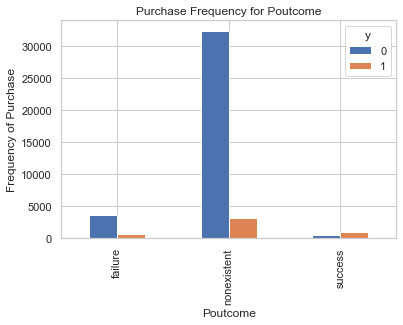

In [21]:
pd.crosstab(data.poutcome, data.y).plot(kind = 'bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

Poutcome 변수도 예측하는데 쓰겠다.

In [4]:
# one-hot-encoding을 통해 범주형 데이터 전처리하기.
cat_vars = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list = 'var' + '_' + var
    cat_list = pd.get_dummies(data[var], prefix = var)
    data1 = data.join(cat_list)
    data = data1

In [5]:
cat_vars = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars = data.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]

In [6]:
data_final = data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'mo

In [7]:
data_final.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,1,0,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,0,1,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,1,0,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,1,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,1,0,0,0,0,0,0,1


학습할 최종 변수들을 선택했다면 y값의 관련된 불균형한 데이터를 SMOTE를 사용하여 업 샘플링해준다.
 1. 복사본을 만드는 대신 부 클래스 (구독 없음)에서 합성 샘플을 만들어 작동합니다.
 2. k- 최근 접 이웃 중 하나를 무작위로 선택하고이를 사용하여 유사하지만 무작위로 조정 된 새로운 관측치를 생성합니다.

In [9]:
from imblearn.over_sampling import SMOTE

In [10]:
X = data_final.loc [:, data_final.columns != 'y']
y = data_final.loc [:, data_final.columns == 'y']

# imblearn.over_sampling에서 SMOTE 가져 오기
os = SMOTE(random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
columns = X_train.columns

os_data_X, os_data_y = os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data = os_data_X, columns = columns)
os_data_y = pd.DataFrame(data = os_data_y, columns = ['y'])

# 데이터 확인하기
print('오버샘플 데이터수', len(os_data_X))
print('오버샘플링 된 정기예금 하지 않은 수', len(os_data_y[os_data_y['y'] == 0]))
print('정기구독 수', len(os_data_y[os_data_y['y'] == 1]))
print('오버샘플링 된 정기예금 하지 않은 비율',len(os_data_y[os_data_y['y'] == 0])/len(os_data_X))
print('오버샘플링 된 정기예금된 수의 비율', len(os_data_y[os_data_y['y'] == 1])/ len(os_data_X))

오버샘플 데이터수 51134
오버샘플링 된 정기예금 하지 않은 수 25567
정기구독 수 25567
오버샘플링 된 정기예금 하지 않은 비율 0.5
오버샘플링 된 정기예금된 수의 비율 0.5


SMOTE를 통해 종속변수에 대한 데이터 균형을 맞추었다.\
Now we have a perfect balanced data! You may have noticed that I over-sampled only on the training data, because by oversampling only on the training data, none of the information in the test data is being used to create synthetic observations, therefore, no information will bleed from test data into the model training.\
\
Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [42]:
# Recursive Feature Elimination (RFE)
# RFE 파라미터 확인해보기
import warnings
warnings.filterwarnings(action = 'ignore')

data_final_vars = data_final.columns.values.tolist()
y = ['y']
X = [i for i in data_final_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True  True False  True  True  True  True  True False  True
  True  True  True  True  True  True  True False False False False False
 False False False False False  True  True  True  True  True False False
 False]
[31 35 30 36 29 28 27 34 25 32 19 11 12 14 18 38 16 13 24 15 20 17  2  3
  4 39  1  1 40  1  1  1  1  1 42  1  1  1  1  1  1  1  1 21  8 23  9 22
 33 10  7 41 26  1  1  1  1  1  6  5 37]


The RFE has helped us select the following features: “euribor3m”, “job_blue-collar”, “job_housemaid”, “marital_unknown”, “education_illiterate”, “default_no”, “default_unknown”, “contact_cellular”, “contact_telephone”, “month_apr”, “month_aug”, “month_dec”, “month_jul”, “month_jun”, “month_mar”, “month_may”, “month_nov”, “month_oct”, “poutcome_failure”, “poutcome_success”.

In [44]:
cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 'default_no', 'default_unknown', 
      'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"] 
X=os_data_X[cols]
y=os_data_y['y']

In [45]:
import statsmodels.api as sm
logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.455646
         Iterations 7
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.343     
Dependent Variable:   y                 AIC:               46637.9802
Date:                 2021-02-23 01:24  BIC:               46814.8243
No. Observations:     51134             Log-Likelihood:    -23299.   
Df Model:             19                LL-Null:           -35443.   
Df Residuals:         51114             LLR p-value:       0.0000    
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
euribor3m             0.1613   0.0082  19.7907 0.0000  0.1454  0.1773
job_blue-collar 

p-value가 0.05보다 낮은 것을 채택, 높은 것들은 제거한다.\
education_illiterate 제거

In [46]:
cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'default_no', 'default_unknown', 
      'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"] 
X=os_data_X[cols]
y=os_data_y['y']

logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.455647
         Iterations 7
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.343     
Dependent Variable:  y                AIC:              46636.1080
Date:                2021-02-23 01:27 BIC:              46804.1099
No. Observations:    51134            Log-Likelihood:   -23299.   
Df Model:            18               LL-Null:          -35443.   
Df Residuals:        51115            LLR p-value:      0.0000    
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      7.0000                                       
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
euribor3m          0.1613   0.0082  19.7888 0.0000  0.1453  0.1773
job_blue-collar   -0.9961   0.0381 -26.1188 0.0000 -1

# 모델 fitting

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [50]:
# 정확도 확인
y_pred = logreg.predict(X_test)
print('Accuracy :', np.round(logreg.score(X_test, y_test), 2) * 100)

Accuracy : 87.0


In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[7021  645]
 [1335 6340]]


In [53]:
# 종속변수가 binary
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      7666
           1       0.91      0.83      0.86      7675

    accuracy                           0.87     15341
   macro avg       0.87      0.87      0.87     15341
weighted avg       0.87      0.87      0.87     15341



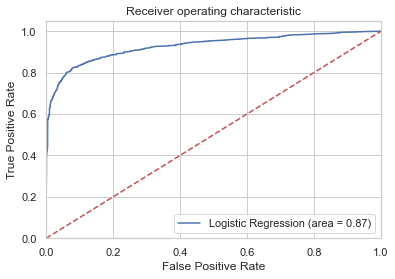

In [54]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = 'Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

좋은 성능의 모델을 보여주고 있다.